# **Data Analysis Assignment**

## **Objective**
In this assignment, you will work with a student dataset to apply and reinforce your knowledge of **pandas, numpy, matplotlib**, and linear regression with **scikit-learn**.

Download and import in a dataframe the CSV file containing the data from this link:

https://raw.githubusercontent.com/pal-dev-labs/Become-a-Data-Scientist-with-Python-and-AI/refs/heads/main/Data/student_performance_dataset.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## **8. Linear Regression**

### **Exercise 1: Single Variable Regression**
Use the `sklearn` library to create a linear regression model between 
**hours_of_study** and **math_average**

In [19]:
url = 'https://raw.githubusercontent.com/pal-dev-labs/Become-a-Data-Scientist-with-Python-and-AI/refs/heads/main/Data/student_performance_dataset.csv'
students = pd.read_csv(url)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_ID           500 non-null    int64  
 1   student_class        496 non-null    float64
 2   hours_of_study       494 non-null    float64
 3   hours_of_smartphone  496 non-null    float64
 4   hours_of_sleep       495 non-null    float64
 5   math_average         499 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [20]:
students = students.dropna()
students

,student_ID,student_class,hours_of_study,hours_of_smartphone,hours_of_sleep,math_average
0,1,4.0,9.0,3.0,5.8,5.5
1,2,5.0,5.5,5.7,8.8,3.7
2,3,3.0,6.2,3.5,5.3,3.0
3,4,5.0,5.3,3.6,6.4,3.0
4,5,5.0,4.2,5.1,7.8,3.0
...,...,...,...,...,...,...
495,496,1.0,6.0,3.8,7.3,4.3
496,497,3.0,9.2,5.8,5.2,6.0
497,498,1.0,5.7,4.1,7.0,3.1
498,499,1.0,6.7,4.2,9.3,4.2


Text(0.5, 1.0, 'Math_average')

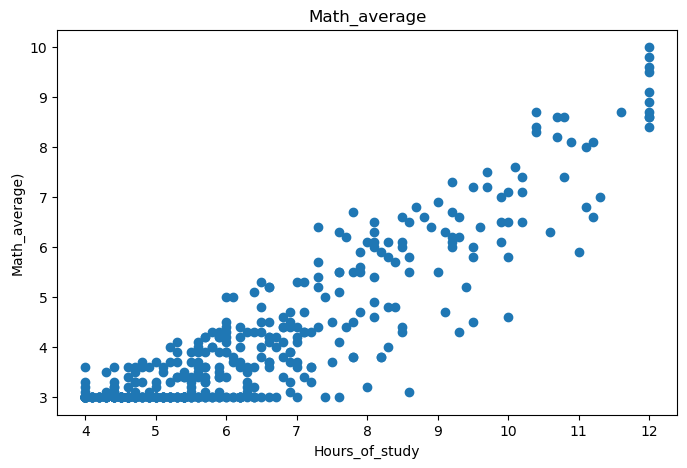

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(students['hours_of_study'].values, students['math_average'].values)
plt.xlabel("Hours_of_study")
plt.ylabel("Math_average)")
plt.title('Math_average')


### Exercise 1: Single Variable Linear Regression
TASK: Create a program that help user to understand what could be the math average of a student based on hours of study.  

Steps:
- based on dataset, train a linear regression model to build the predicton function. Use **hours_of_study** as a training set and **math_average** as a target
- ask the user to insert the number of hours of study
- calculate the prediction and answer to the user

The model is $h(x) = \hat y =  w_0 + w_1x$

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# input features
x_train = students['hours_of_study'].values
x_train =x_train.reshape(-1,1)
# target
y_train = students['math_average'].values
y_train =y_train.reshape(-1,1)

model.fit(x_train, y_train)

LinearRegression()

Let's print the trained parameters w0 and w1

In [24]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]
print("Regression function is h(x)=", w0,"x + ",w1,"y")

Regression function is h(x)= -0.12491159377174377 x +  0.6731459433292238 y


Calculate the forecast

In [52]:
a = float(input("Please insert the hours of study of the student: "))
values = np.array([a]).reshape((-1,1))
y1 = model.predict(values)
print("The estimated math average of the students will be: ", y1.item())

The estimated math average of the students will be:  2.9042451512097633


## Simple Linear Regression - Theory recap
- We have a bunch of numbers: predictors $X$ and target $Y$

- We want to find a **functional relation** between predictors $X$ and target $Y$. 

- In general we can think that $Y$ is a dependent variable and $X$ is an independent variable.

- If I'm looking for a functional relationship between $Y$ and $X$, it means $Y=h(X)$. 

- For **Linear regression** I ASSUME $h$ is **linear**. $h(X) = w_0 + w_1 X$.

- We perform a training task to calculate $w_0$, $w_1$. 

- One we have a trained model, we can make a prediction for a new feature $X$ that is $\hat Y =  h(X) = w_0 + w_1 X$. 

- Of course, for each sample, if a use the $h$ function, there is **error**: $ ε_i = Y_i - \hat Y_i$

- Cost function MINIMIZE the SUM of the square error $ \sum ε_i^2 = \sum (Y_i - \hat Y_i)^2$

Let's look a little bit inside this error


Let's print the first raws of our table

In [64]:
students.head()

,student_ID,student_class,hours_of_study,hours_of_smartphone,hours_of_sleep,math_average
0,1,4.0,9.0,3.0,5.8,5.5
1,2,5.0,5.5,5.7,8.8,3.7
2,3,3.0,6.2,3.5,5.3,3.0
3,4,5.0,5.3,3.6,6.4,3.0
4,5,5.0,4.2,5.1,7.8,3.0


Let's take the first sample: X = 9.0 and Y = 5.5

In [69]:
x_train_1 = np.array([9.0]).reshape(-1,1)
y_train_1 = np.array([5.5])

Using our model we can calculate the forecast for X=9.0

In [70]:
y1_hat = model.predict(x_train_1)

In [73]:
print("X=",x_train_1," Y=", y_train_1," Y_hat = ", y1_hat.item())

X= [[9.]]  Y= [5.5]  Y_hat =  5.9334018961912705


Let's calculate the error

In [76]:
error1 = y1_hat-y_train_1
print (error1)


[[0.4334019]]


Let's plot the data

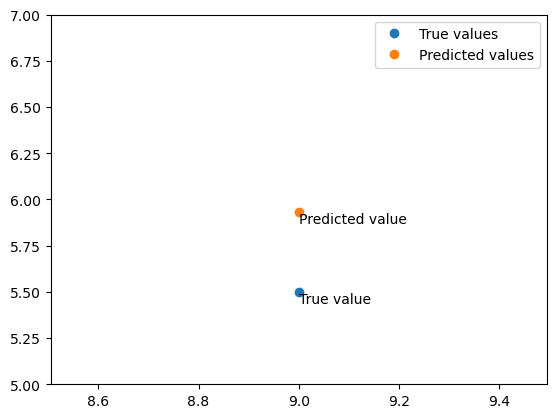

In [89]:
# Plot dei dati
plt.plot(x_train_1, y_train_1, 'o', label='True values')  # Dati veri
plt.plot(x_train_1, y1_hat, 'o', label='Predicted values')  # Dati predetti

# Aggiungi etichette vicino al primo punto di ogni serie
plt.text(x_train_1[0], y_train_1[0], 'True value', ha='left', va='top')  # Etichetta per il primo vero valore
plt.text(x_train_1[0], y1_hat[0], 'Predicted value', ha='left', va='top')  # Etichetta per la prima predizione

# Imposta i limiti dell'asse y
plt.ylim(5, 7)

# Aggiungi legenda (opzionale)
plt.legend()

# Mostra il grafico
plt.show()

## EXERCISE: Calculate the forecast for all features. 
- Create a dataframe to show for all features the below information:

hours_of_study	math_average	y_hat	    error	    error_squared
9.0	            5.5	            5.933402	0.433402	0.187837
5.5         	3.7	            3.577391	-0.122609	0.


- Make a scatter Plot of the true value and predicted values
- Plot in the same chart the regression line $h(x)$

In [90]:
table_summary = students[['hours_of_study', 'math_average']].copy()
y_hat = model.predict(x_train)      # calculate predictions
error = y_hat-y_train
error_squared = error**2
table_summary['y_hat']= y_hat
table_summary['error']= error
table_summary['error_squared']= error_squared



In [91]:
table_summary

,hours_of_study,math_average,y_hat,error,error_squared
0,9.0,5.5,5.933402,0.433402,0.187837
1,5.5,3.7,3.577391,-0.122609,0.015033
2,6.2,3.0,4.048593,1.048593,1.099548
3,5.3,3.0,3.442762,0.442762,0.196038
4,4.2,3.0,2.702301,-0.297699,0.088624
...,...,...,...,...,...
495,6.0,4.3,3.913964,-0.386036,0.149024
496,9.2,6.0,6.068031,0.068031,0.004628
497,5.7,3.1,3.712020,0.612020,0.374569
498,6.7,4.2,4.385166,0.185166,0.034287


Text(0.5, 1.0, 'Error in prediction')

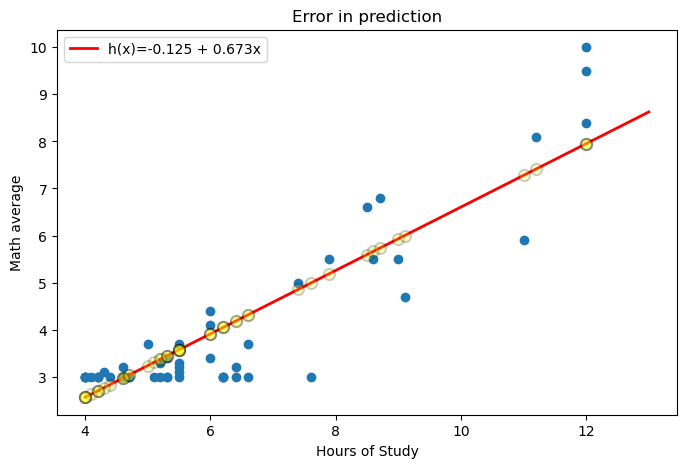

In [247]:
plt.figure(figsize=(8,5))
plt.scatter(x_train[0:50], y_train[0:50])

# plot of the regression line

def h (x,w0,w1):
    y = w0 + w1*x
    return y

# punti x 
x0 = 4; x1 = 13

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

#plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.plot(p1, p2, '-r', lw=2, label=f'h(x)={w0:.3f} + {w1:.3f}x')


plt.legend()
# plot della prediction su tutte le features
plt.plot(x_train[0:50], y_hat[0:50], 'o', color='yellow', alpha=0.2, ms=8, mec='black', mew=1.5)

#plt.xlim(4,6)
plt.xlabel("Hours of Study")
plt.ylabel("Math average")
plt.title('Error in prediction')

# the COST FUNCTION

The COST FUNCTION (named also MEAN SQUARE ERROR for linear regression model) is defined as:


$J = \frac{1}{2N} \sum \limits_{i=1}^{N} (\epsilon_i)^2$

where  $ ε_i = \hat Y_i - Y_i$ and $N$ is the total number of features

expanding 


$J(w_0, w_1) = \frac{1}{2n} \sum \limits_{i=1}^{n} (h_{w_o,w_1}(X_i)-Y_i)^2$

We note that as the $h$ function DEPENDS on $w_0$ and $w_1$, the COST FUNCTION also DEPENDS on $w_0$ and $w_1$ 


## EXERCISE: PLOT in a chart all the values of the error 

Let's plot the values of all the error  

Text(0, 0.5, 'Error value')

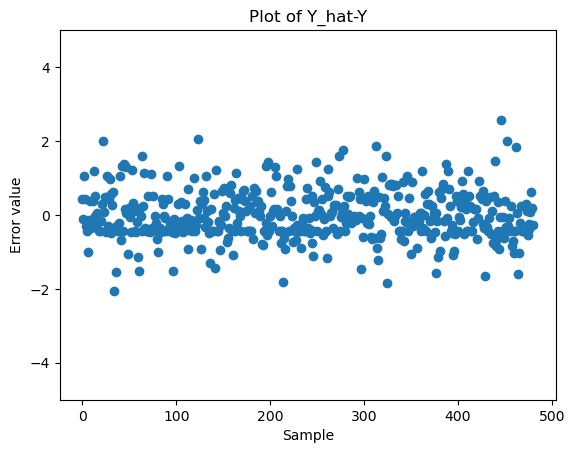

In [121]:
plt.plot(error, 'o')

plt.ylim(-5,5)
plt.plot()
plt.title('Plot of Y_hat-Y')
plt.xlabel("Sample")
plt.ylabel("Error value")

OBSERVATION: 
- VALUES are distributed between -2 e 2
- IThe mean value seems to be 0

Let's try to plot with an HISTOGRAM

Text(0.5, 1.0, 'Distribution of errors')

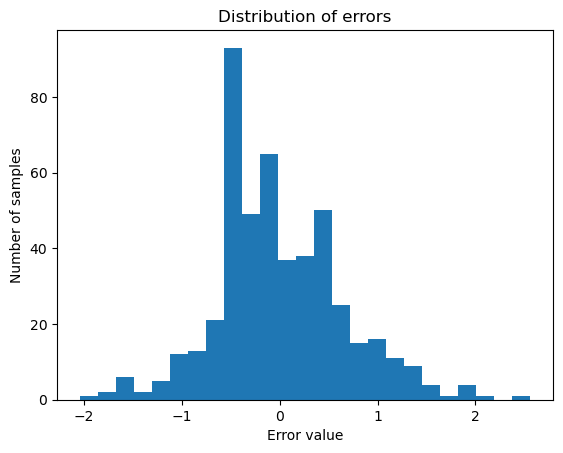

In [123]:
plt.hist(error, bins=25);
plt.xlabel
plt.xlabel("Error value")
plt.ylabel("Number of samples")
plt.title("Distribution of errors")

Let's try to change value of bin

Text(0.5, 1.0, 'Distribution of errors')

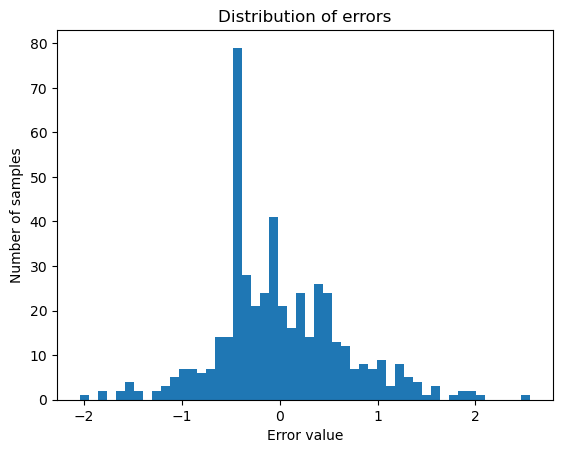

In [130]:
plt.hist(error, bins=50);
plt.xlabel
plt.xlabel("Error value")
plt.ylabel("Number of samples")
plt.title("Distribution of errors")

Let's try to calcolate the average error (THE MEAN of the distribution): $\frac{1}{N} \sum \epsilon_i$

## THE SAMPLE VARIANCE and STANDARD DEVIATION

- Variance measures the spread of data points from the mean; it is the average of squared differences from the mean.

- Standard Deviation (SD) is the square root of variance, showing how much data deviates from the mean in original units.

- The SAMPLE VARIANCE is defined as  $\sigma^2 = \frac{1}{N-1} \sum \limits_{i=1}^{N}  (x_i- \bar x)^2$

- The STANDARD DEVIATION is defined as $\sigma$

- Usage: A higher variance/SD means more **spread-out data**, while a lower value means data is closer to the mean.

In [261]:
mean_error = error.mean()
print('Average: ',mean_error)

Average:  7.090655159352352e-16


In [271]:
variance = error.var()
print("Variance=", variance)
sigma = np.sqrt(variance)
print("Standard Deviation=", sigma)

Variance= 0.44069532333786837
Standard Deviation= 0.6638488708568151


Text(0.5, 1.0, 'Distribution of errors')

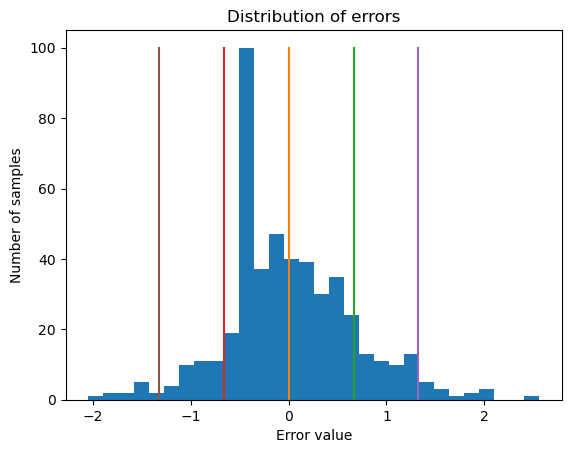

In [284]:
plt.hist(error, bins=30);
plt.xlabel
plt.xlabel("Error value")
plt.plot([mean_error,mean_error],[0,100])
plt.plot([sigma,sigma],[0,100])
plt.plot([-sigma,-sigma],[0,100])
plt.plot([2*sigma,2*sigma],[0,100])
plt.plot([-2*sigma,-2*sigma],[0,100])

plt.ylabel("Number of samples")
plt.title("Distribution of errors")

Let's try to plot $\epsilon ^2$

Costruiamo il vettore $(h(x^i) - y^i))^2$

Ricordiamo che $h(x^i)$ è y_predict, mentre $y^i$ è y_train

In [311]:
squared = np.square(error)

Text(0.5, 1.0, 'Plot of (h(x)-y)^2')

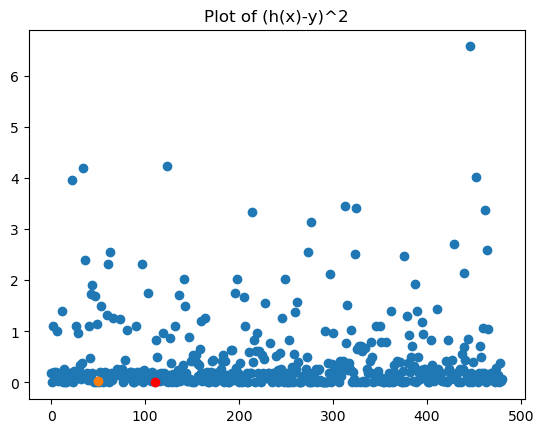

In [312]:
# plotto tutti quadrati delle differenze
plt.plot(squared, 'o')
# metto in evidenza tre differenze
plt.plot(np.array([50]), squared[50], 'o')
plt.plot(np.array([111]), squared[111], 'o', color='red')
plt.plot()
plt.title('Plot of (h(x)-y)^2')

OSSERVAZIONI: 
- Notiamo che i valori sono tutti positivi
- la Mean Square Error è più sensibile agli errori elevati rispetto ad altre metriche.  Ciò significa che, se il modello genera un errore molto grande per alcuni dati, la MSE aumenterà molto. Questa caratteristica può essere utile in alcuni contesti in cui gli errori elevati devono essere penalizzati maggiormente.


Let's try to have a look of the COST FUNCTION


$J(w_0, w_1) = \frac{1}{2n} \sum \limits_{i=1}^{n} (h_{w_o,w_1}(X_i)-Y_i)^2$

We note that as the $h$ function DEPENDS on $w_0$ and $w_1$, the COST FUNCTION also DEPENDS on $w_0$ and $w_1$ 


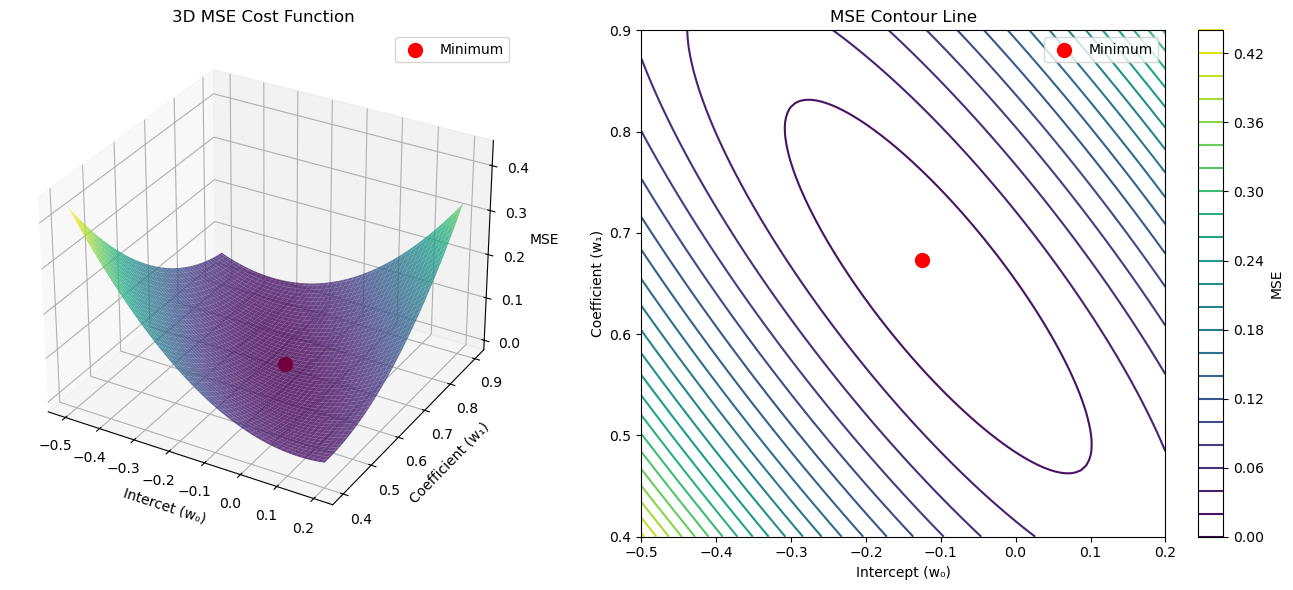

In [315]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Dati di esempio (sostituisci con i tuoi dati reali)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 0.67 * X - 0.125 + np.random.randn(100, 1) * 0.1  # y = 0.67x - 0.125 + rumore

# Valori ottimali trovati
intercept_opt = -0.12491159
coef_opt = 0.67314594

# Funzione per calcolare MSE
def mse_loss(theta0, theta1):
    predictions = theta0 + theta1 * X
    return np.mean((predictions - y) ** 2)

# Creazione grid per plotting
theta0_vals = np.linspace(-0.5, 0.2, 100)
theta1_vals = np.linspace(0.4, 0.9, 100)
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros_like(Theta0)

for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        J_vals[i,j] = mse_loss(Theta0[i,j], Theta1[i,j])

# Plot 3D
fig = plt.figure(figsize=(14, 6))

# Plot 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Theta0, Theta1, J_vals, cmap=cm.viridis, alpha=0.8)
ax1.scatter(intercept_opt, coef_opt, mse_loss(intercept_opt, coef_opt), 
           color='red', s=100, label='Minimum')
ax1.set_xlabel('Intercet (w₀)')
ax1.set_ylabel('Coefficient (w₁)')
ax1.set_zlabel('MSE')
ax1.set_title('3D MSE Cost Function')
ax1.legend()

# Curve di livello
ax2 = fig.add_subplot(122)
contour = ax2.contour(Theta0, Theta1, J_vals, levels=20, cmap=cm.viridis)
ax2.scatter(intercept_opt, coef_opt, color='red', s=100, label='Minimum')
ax2.set_xlabel('Intercept (w₀)')
ax2.set_ylabel('Coefficient (w₁)')
ax2.set_title('MSE Contour Line')
plt.colorbar(contour, label='MSE')
ax2.legend()

plt.tight_layout()
plt.show()

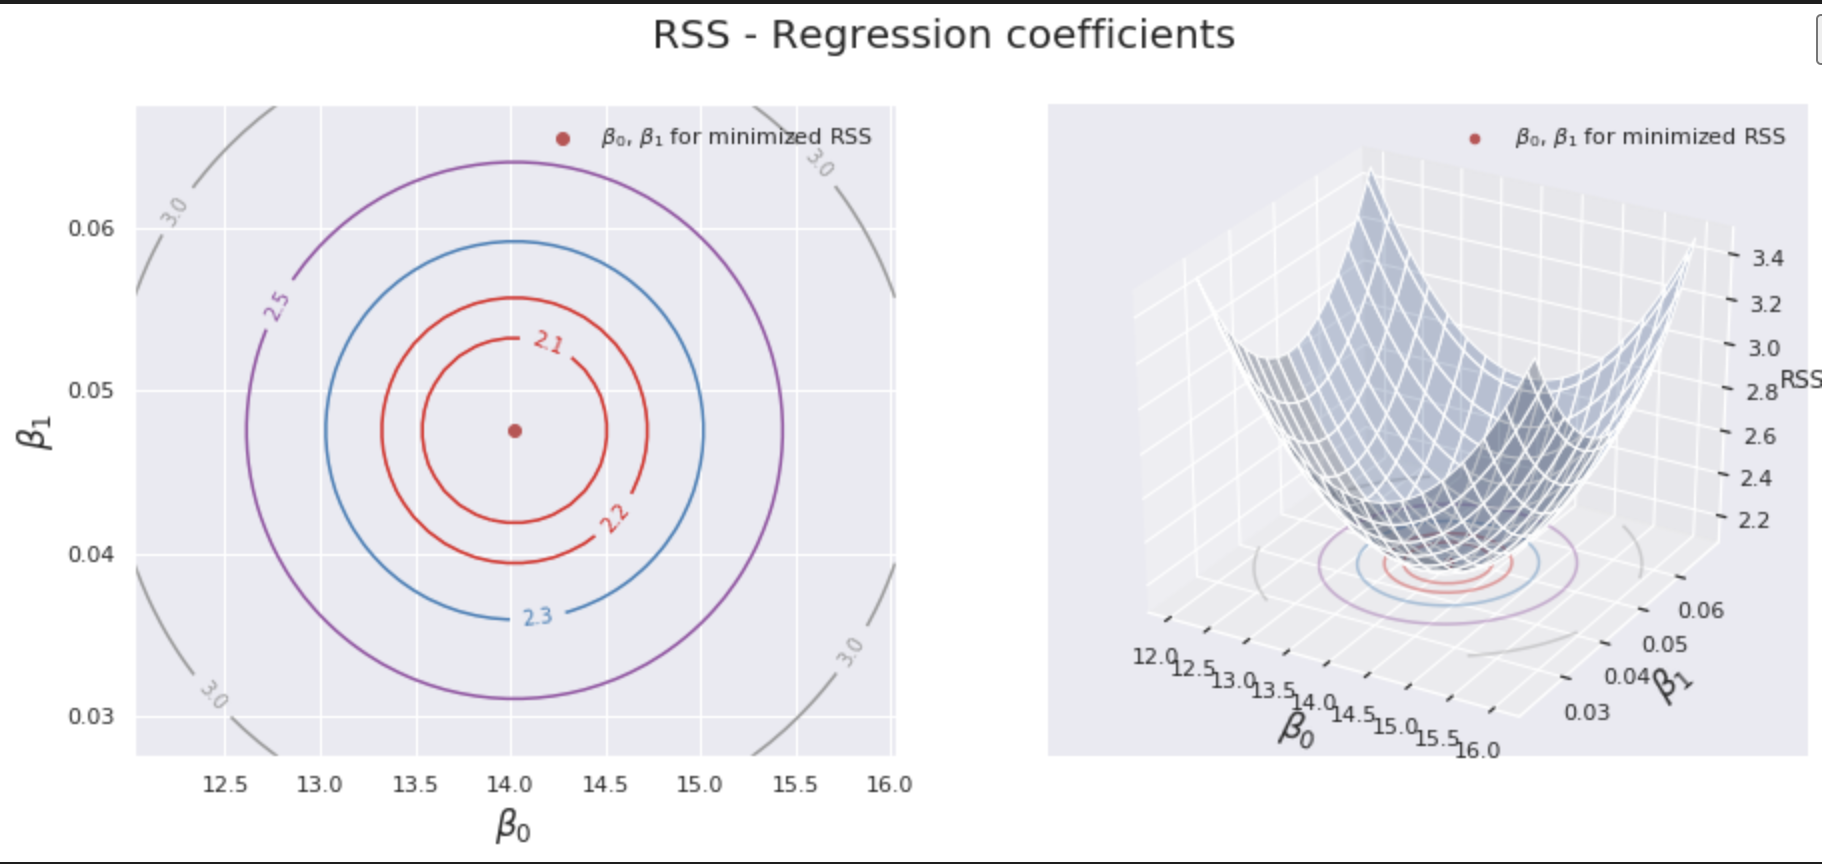

OBSERVATION
- When we "Train" the model, we find the value w0 and w1 that MINIMIZE the cost function.
- THe values corresponds to the minimum value of the function.
- We can find this valued with mathematica tools

In [316]:
#  statsmodels is a Python module that provides classes and functions for the estimation of many different
# statistical models,as well as for conducting statistical tests, and statistical data exploration
import statsmodels.api as sm
import statsmodels.formula.api as smf

import statistics as st

In [318]:
# now we use a richer model from statsmodels library
# from statsmodels.formula.api

lm = smf.ols('math_average ~ hours_of_study', students)

est = lm.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           math_average   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          4.33e-173
Time:                        13:10:27   Log-Likelihood:                -485.44
No. Observations:                 481   AIC:                             974.9
Df Residuals:                     479   BIC:                             983.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1249      0.097     -1.285      0.199      -0.316       0.066
hours_of_study     0.6731      0.015     44.717      0.000       0.644       0.703
==============================================================================
Omnibus:                       20.357   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.037
Skew:                          -0.393   Prob(JB):                     2.22e-06
Kurtosis:                       3.826   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Model Summary
Dependent Variable: math_average
This means the regression model is trying to predict math_average based on one or more independent variables.

- Model Type: Ordinary Least Squares (OLS)
The regression was performed using the Least Squares method, which minimizes the sum of squared residuals.

- R-squared: 0.807
The model explains 80.7% of the variance in the dependent variable (math_average). This indicates a strong fit.

- Adjusted R-squared: 0.806
The adjusted R-squared slightly reduces the value to 0.806, adjusting for the number of predictors. Since it's very close to R-squared, it suggests that the model is not overfitting.

- Statistical Significance
F-statistic: 2000
This indicates that the overall model is highly significant, meaning at least one predictor is meaningfully related to math_average.

- Intercept Analysis
Intercept: -0.1249
This means that when all independent variables are zero, the expected value of math_average is approximately -0.1249 (which may not be meaningful depending on the context of the data).

- Standard Error (std err): 0.097
Measures the precision of the intercept estimate.


- p-value (P>|t|): 0.199
The p-value is greater than 0.05, indicating that the intercept is not statistically significant at a 95% confidence level.

- Confidence Interval [0.025, 0.975]: (-0.316, 0.066)
This range suggests that the true intercept value is likely between -0.316 and 0.066, further confirming that the intercept is not significantly different from zero.

- Key Takeaways
The model has strong explanatory power (R² = 0.807).

- The overall model is statistically significant (F-statistic = 2000).

- The intercept is not statistically significant (p-value = 0.199), meaning it might not contribute meaningfully to the prediction.